In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.patches as pch

In [48]:
T=10#总时间
h=T/1000#计算时间间隔
t=np.linspace(0,T,1000)
x=np.zeros_like(t)
y=np.zeros_like(t)
vx=np.zeros_like(t)
vy=np.zeros_like(t)
ax=np.zeros_like(t)
ay=np.zeros_like(t)
x1=np.zeros_like(t)
y1=np.zeros_like(t)
vx1=np.zeros_like(t)
vy1=np.zeros_like(t)
ax1=np.zeros_like(t)
ay1=np.zeros_like(t)
x2=np.zeros_like(t)
y2=np.zeros_like(t)
vx2=np.zeros_like(t)
vy2=np.zeros_like(t)
ax2=np.zeros_like(t)
ay2=np.zeros_like(t)

In [11]:
math.sin(math.pi/4)-1/math.sqrt(2)

1.1102230246251565e-16

In [49]:
x[0]=1 
y[0]=0.5#(m)
v0=1#
vx[0]=v0*math.sin(math.pi/4)
vy[0]=v0*math.sin(math.pi/4)
#R=math.sqrt(x[0]*x[0]+y[0]*y[0])
ax[0]=0
ay[0]=0
x1[0]=1 
y1[0]=0.5#(m)
v0=1#
vx1[0]=0
vy1[0]=v0
#R=math.sqrt(x[0]*x[0]+y[0]*y[0])
ax1[0]=0
ay1[0]=0
x2[0]=1 
y2[0]=0.5#(m)
v0=1#
vx2[0]=v0*math.cos(math.pi/18)
vy2[0]=v0*math.sin(math.pi/18)
#R=math.sqrt(x[0]*x[0]+y[0]*y[0])
ax2[0]=0
ay2[0]=0

In [51]:
for i in range(999):
    x[i+1]=(x[i]+vx[i]*h+0.5*h*h*ax[i])%4
    y[i+1]=(y[i]+vy[i]*h+0.5*h*h*ay[i])%4
    vx_temp=vx[i]+0.5*h*ax[i]
    vy_temp=vy[i]+0.5*h*ay[i]
    #R=math.sqrt(x[i+1]*x[i+1]+y[i+1]*y[i+1])
    #ax[i+1]=-G*M/pow(R,3)*x[i+1]
    #ay[i+1]=-G*M/pow(R,3)*y[i+1]
    vx[i+1]=vx_temp+0.5*h*ax[i+1]
    vy[i+1]=vy_temp+0.5*h*ay[i+1]
for i in range(999):
    x1[i+1]=(x1[i]+vx1[i]*h+0.5*h*h*ax1[i])%4
    y1[i+1]=(y1[i]+vy1[i]*h+0.5*h*h*ay1[i])%4
    vx_temp=vx1[i]+0.5*h*ax1[i]
    vy_temp=vy1[i]+0.5*h*ay1[i]
    #R=math.sqrt(x[i+1]*x[i+1]+y[i+1]*y[i+1])
    #ax[i+1]=-G*M/pow(R,3)*x[i+1]
    #ay[i+1]=-G*M/pow(R,3)*y[i+1]
    vx1[i+1]=vx_temp+0.5*h*ax1[i+1]
    vy1[i+1]=vy_temp+0.5*h*ay1[i+1]
for i in range(999):
    x2[i+1]=(x2[i]+vx2[i]*h+0.5*h*h*ax2[i])%4
    y2[i+1]=(y2[i]+vy2[i]*h+0.5*h*h*ay2[i])%4
    vx_temp=vx2[i]+0.5*h*ax2[i]
    vy_temp=vy2[i]+0.5*h*ay2[i]
    #R=math.sqrt(x[i+1]*x[i+1]+y[i+1]*y[i+1])
    #ax[i+1]=-G*M/pow(R,3)*x[i+1]
    #ay[i+1]=-G*M/pow(R,3)*y[i+1]
    vx2[i+1]=vx_temp+0.5*h*ax2[i+1]
    vy2[i+1]=vy_temp+0.5*h*ay2[i+1]

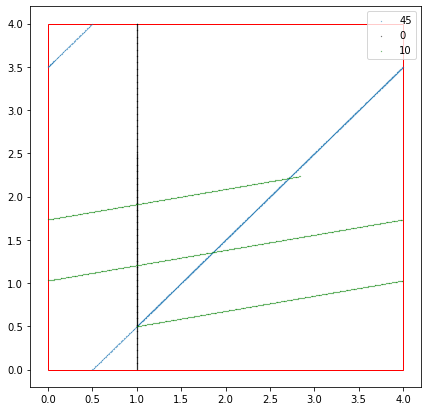

In [76]:
fig,ax=plt.subplots(figsize=(7,7))
rect = pch.Rectangle(xy=(0, 0), width=4, height=4, edgecolor='red',fill=False)
ax.add_patch(rect)
#plt.legend(['background'],loc='upper right',frameon=False)
#fig_sub1 = fig.add_subplot(111)
A=plt.scatter(x,y,s=0.05,label='45')
B=plt.scatter(x1,y1,s=0.05,c='black',label='0')
C=plt.scatter(x2,y2,s=0.05,c='green',label='10')
plt.legend(loc='best')
plt.show()

# 第二题 

粒子j对粒子i作用力为$$F_{{ij}}= -\bigtriangledown _{r_{i}}U(\vec{r_{i}},\vec{r_{j}})$$<br>
$$U(\vec{r_{i}},\vec{r_{j}})=4((\frac{1}{r})^{12}-(\frac{1}{r})^{6})$$<br>
$$\therefore F(\vec{r_{i}},\vec{r_{j}})=4(12(\frac{1}{r})^{13}-6(\frac{1}{r})^{7})\hat{r}$$
其中$\hat{r}是粒子i到粒子j方向的单位矢量$<br>

**但是考虑到周期性边界条件，在计算粒子i受到的来自粒子j的力时，需要考虑粒子j相对粒子i最近的镜像**<br>
**也就是说,$\vec{r_{j}}$可以取$\vec{r_{j}}=(x_{j}\pm L)\hat{i}+(y_{j}\pm L)\hat{j}+(z_{j}\pm L)\hat{k}$**<br>
**又因为利用最近镜像，则需采用截断半径$r_{c}$，避免重复计算受力，此处取$r_{c}=\frac{L}{2}$**

In [275]:
T=10#总时间
h=T/10000#计算时间间隔
t=np.linspace(0,T,10000)

In [276]:
x=np.zeros((27,10000))
y=np.zeros((27,10000))
z=np.zeros((27,10000))
vx=np.zeros((27,10000))
vy=np.zeros((27,10000))
vz=np.zeros((27,10000))
ax=np.zeros((27,10000))
ay=np.zeros((27,10000))
az=np.zeros((27,10000))

## 初始条件：27个粒子均匀分布在立方体网格上，立方体中心为(2.5,2.5,2.5)

In [277]:
location=np.array([[2.5,2.5,2.5],
                 [1.5,2.5,2.5],
                 [3.5,2.5,2.5],
                 [2.5,1.5,2.5],
                 [2.5,3.5,2.5],
                 [2.5,2.5,1.5],
                 [2.5,2.5,3.5],
                 [3.5,3.5,2.5],
                 [3.5,1.5,2.5],
                 [1.5,3.5,2.5],
                 [1.5,1.5,2.5],
                 [3.5,2.5,3.5],
                 [3.5,2.5,1.5],
                 [1.5,2.5,3.5],
                 [1.5,2.5,1.5],
                 [2.5,3.5,3.5],
                 [2.5,3.5,1.5],
                 [2.5,1.5,3.5],
                 [2.5,1.5,1.5],
                 [3.5,3.5,3.5],
                 [3.5,3.5,1.5],
                 [3.5,1.5,3.5],
                 [1.5,3.5,3.5],
                 [1.5,1.5,3.5],
                 [1.5,3.5,1.5],
                 [3.5,1.5,1.5],
                 [1.5,1.5,1.5],])


In [278]:
for i in range(27):
    x[i][0]=location[i][0]
    y[i][0]=location[i][1]
    z[i][0]=location[i][2]


## 给位于立方体中心的粒子位置上和速度上的扰动

In [279]:
r0=np.random.rand(6)

In [280]:
x[0][0]=x[0][0]+0.2*r0[0]
y[0][0]=y[0][0]+0.2*r0[1]
z[0][0]=z[0][0]+0.2*r0[2]
vx[0][0]=0.1*r0[3]
vy[0][0]=0.1*r0[4]
vx[0][0]=0.1*r0[5]

In [281]:
L=5#盒长
rc=2.5#截断半径

In [282]:
def compare(xi,xj):#计算最近镜像
    if abs(xi-xj)<=abs(xi-xj+L):
        if abs(xi-xj)<=abs(xi-xj-L):
            px=0
            dx=abs(xi-xj)
        else:
            px=+1
            dx=abs(xi-xj-L)
    else:
        if abs(xi-xj+L)<=abs(xi-xj-L):
            px=-1
            dx=abs(xi-xj+L)
        else:
            px=+1
            dx=abs(xi-xj-L)
    return px,dx

In [283]:
def cal_r(xi,yi,zi,xj,yj,zj):
    px,dx=compare(xi,xj)
    py,dy=compare(yi,yj)
    pz,dz=compare(zi,zj)
    r=math.sqrt(dx*dx+dy*dy+dz*dz)
    return r,px,py,pz#px,py,pz表示镜像的位置    

In [284]:
t.size

10000

In [285]:
vx_temp=np.zeros(27)
vy_temp=np.zeros(27)
vz_temp=np.zeros(27)
for i in range(9999):
    #print(i)

    for j in range(27):
        x[j][i+1]=(x[j][i]+vx[j][i]*h+0.5*h*h*ax[j][i])%L#取模，周期性边条件
        y[j][i+1]=(y[j][i]+vy[j][i]*h+0.5*h*h*ay[j][i])%L
        z[j][i+1]=(z[j][i]+vz[j][i]*h+0.5*h*h*az[j][i])%L
    for j in range(27):
        vx_temp[j]=vx[j][i]+0.5*h*ax[j][i]
        vy_temp[j]=vy[j][i]+0.5*h*ay[j][i]
        vz_temp[j]=vz[j][i]+0.5*h*az[j][i]
        for k in range(27):
            if j==k:
                continue
            rjk,px,py,pz=cal_r(x[j][i+1],y[j][i+1],z[j][i+1],x[k][i+1],y[k][i+1],z[k][i+1])
            if (rjk>rc or rjk==0): 
                continue
            else:
                #print(j,k,rij)
                ax[j][i+1]+=4*(12*math.pow(rjk,-14)-6*math.pow(rjk,-8))*(x[j][i+1]-x[k][i+1]-px*L)
                ay[j][i+1]+=4*(12*math.pow(rjk,-14)-6*math.pow(rjk,-8))*(y[j][i+1]-y[k][i+1]-py*L)
                az[j][i+1]+=4*(12*math.pow(rjk,-14)-6*math.pow(rjk,-8))*(z[j][i+1]-z[k][i+1]-pz*L)
        vx[j][i+1]=vx_temp[j]+0.5*h*ax[j][i+1]
        vy[j][i+1]=vy_temp[j]+0.5*h*ay[j][i+1]
        vz[j][i+1]=vz_temp[j]+0.5*h*az[j][i+1]
     
   


In [147]:
from mpl_toolkits.mplot3d import Axes3D

## 每过0.05s画出27个粒子所在位置的散点图

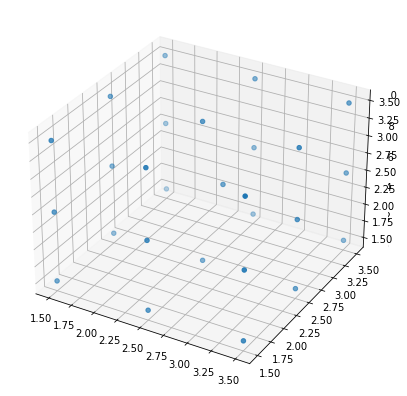

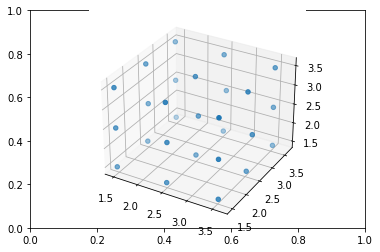

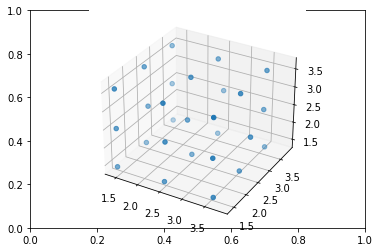

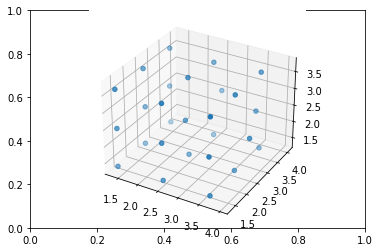

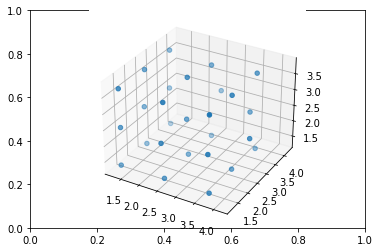

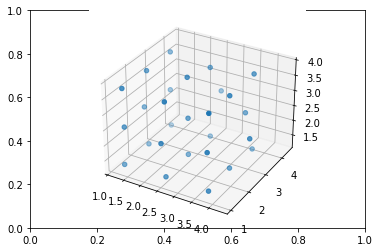

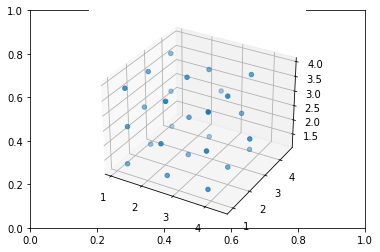

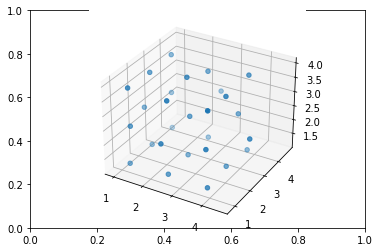

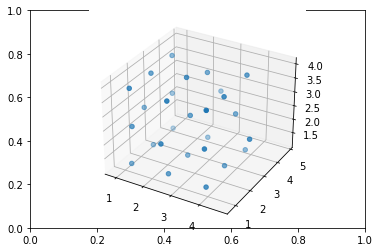

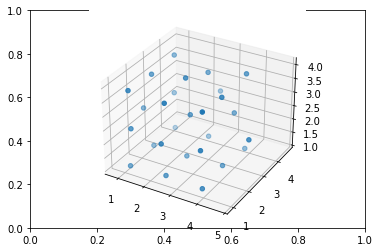

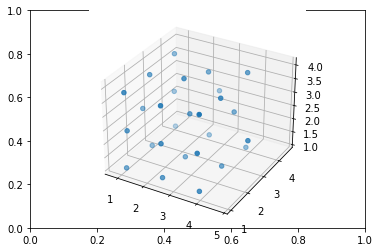

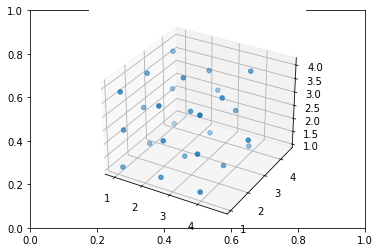

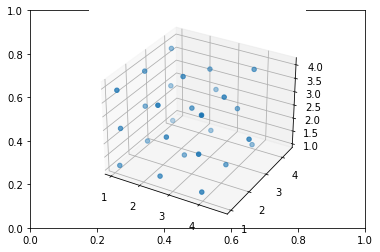

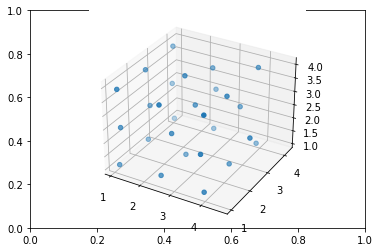

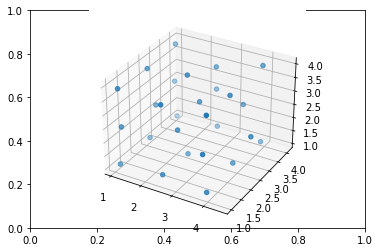

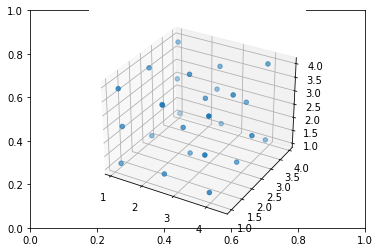

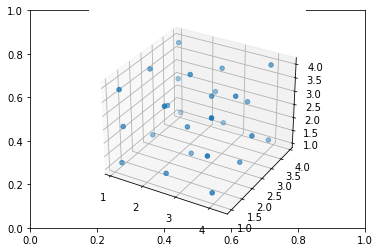

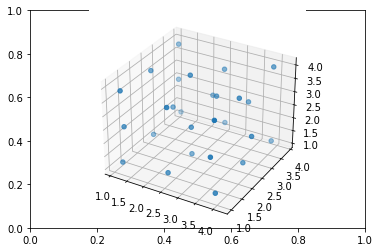

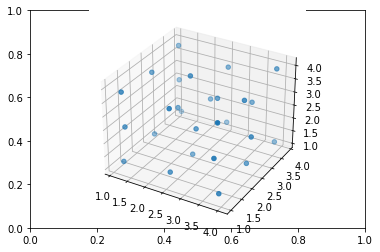

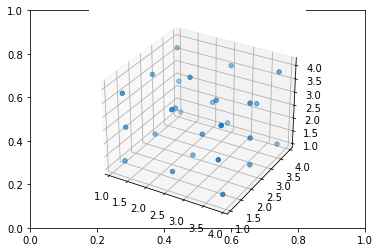

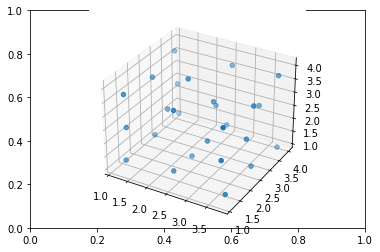

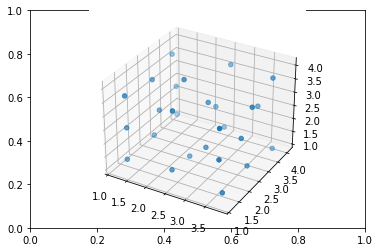

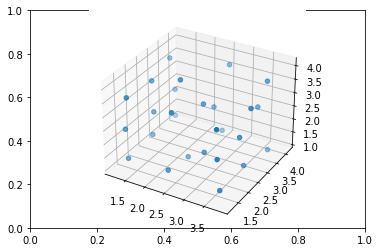

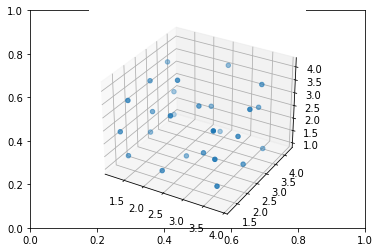

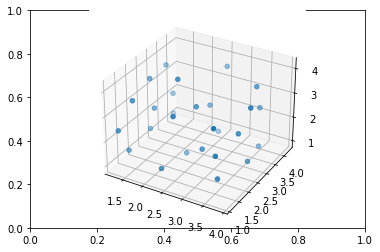

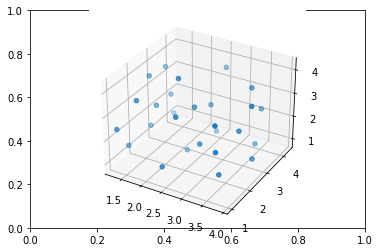

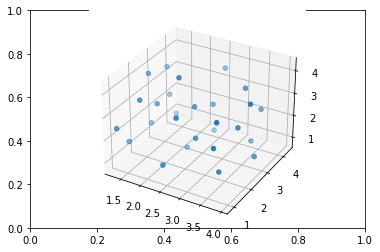

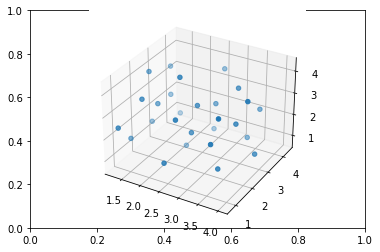

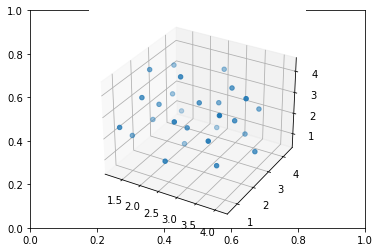

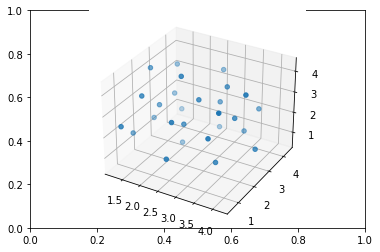

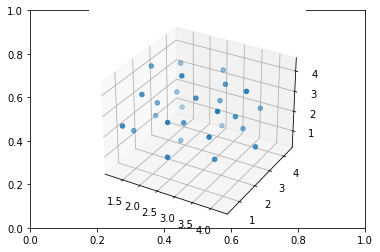

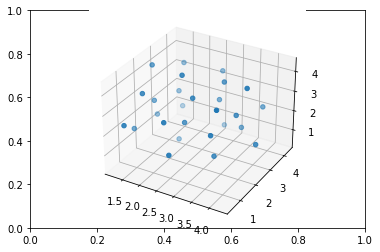

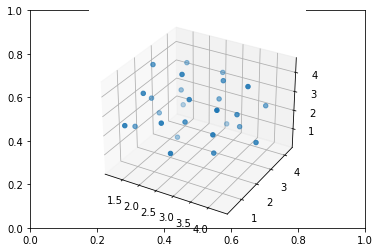

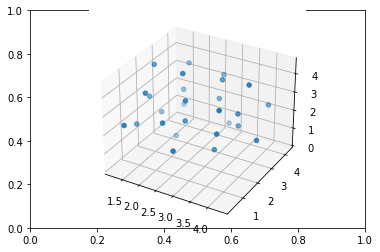

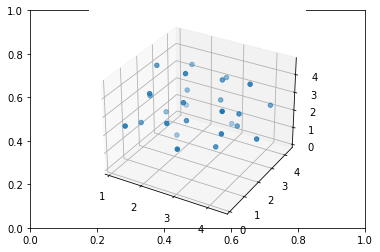

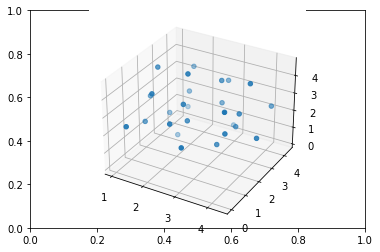

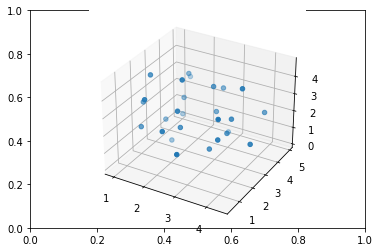

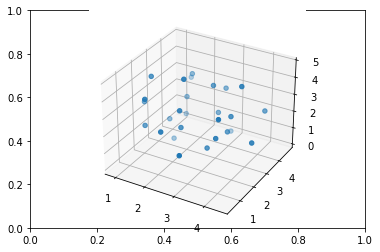

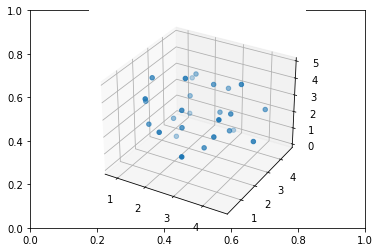

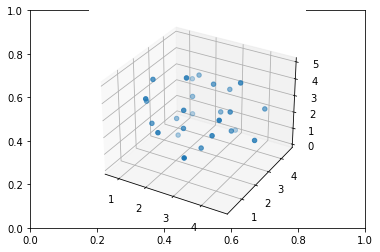

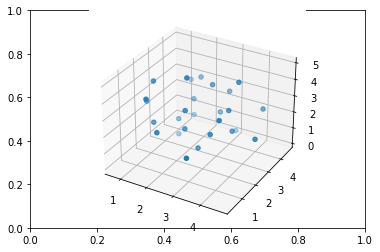

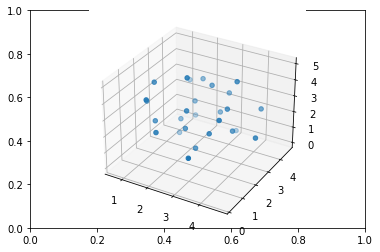

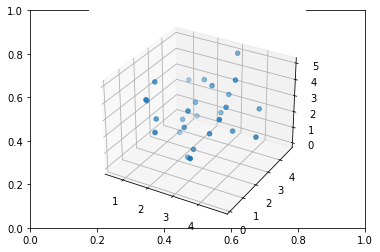

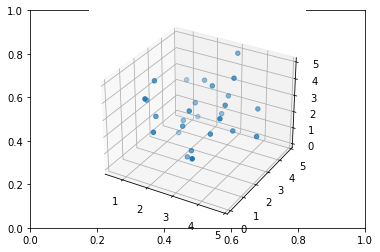

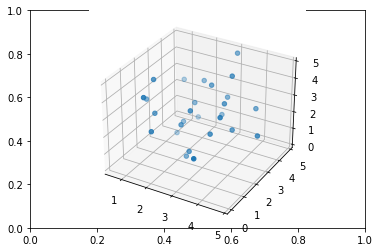

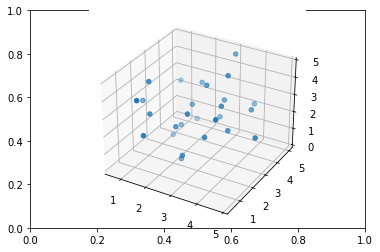

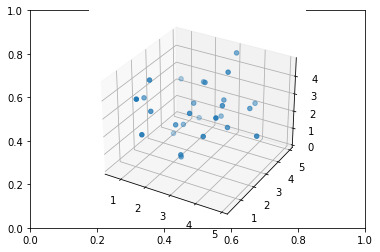

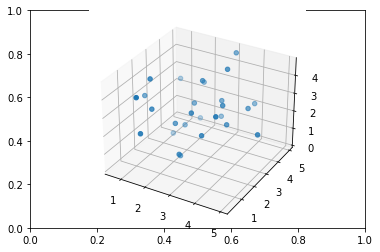

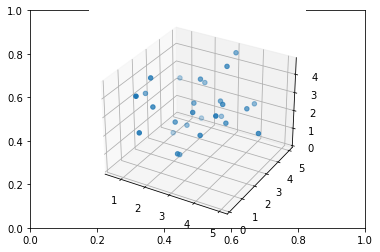

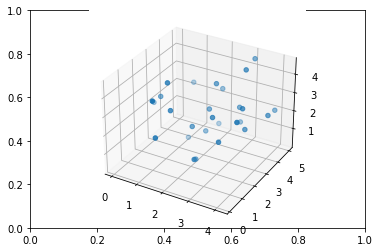

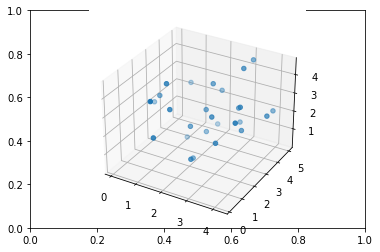

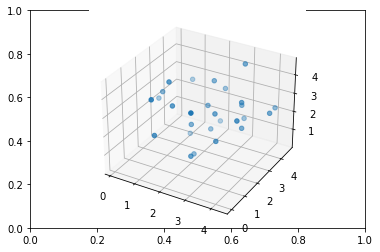

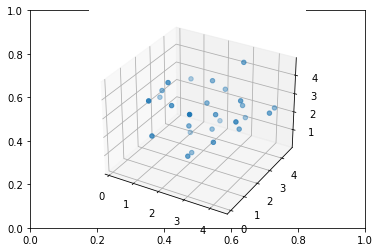

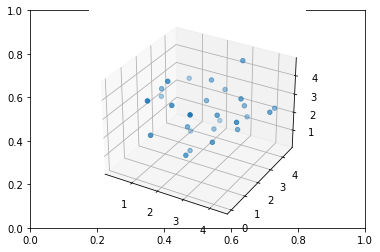

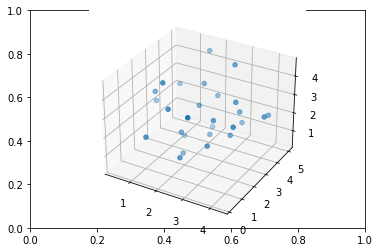

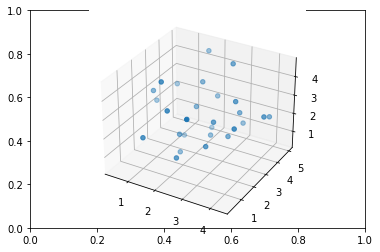

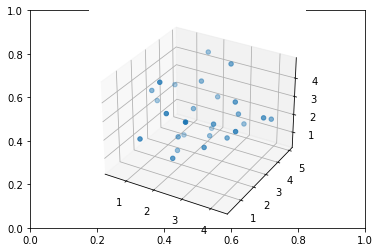

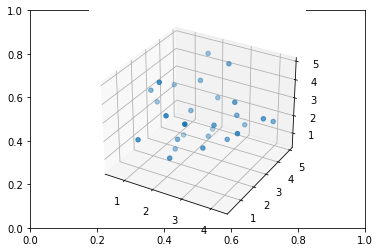

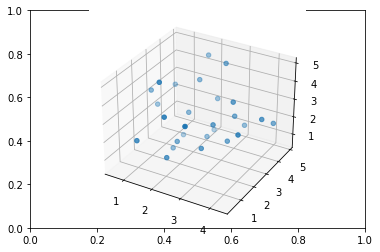

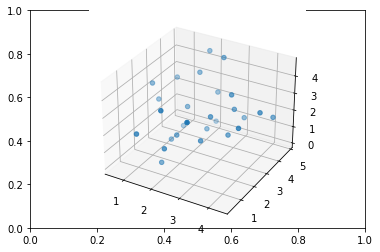

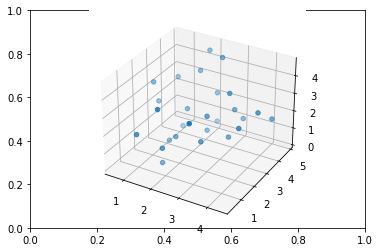

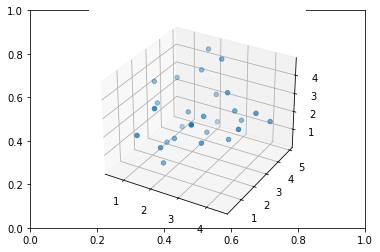

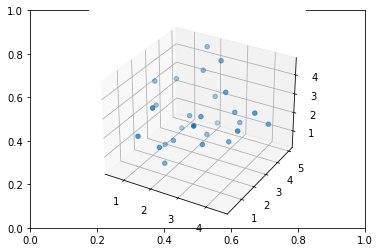

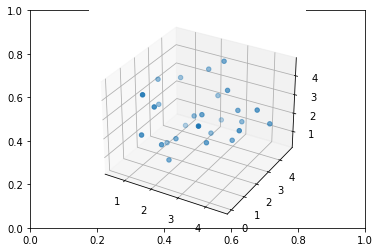

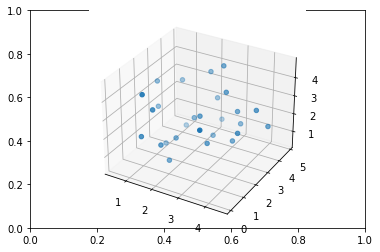

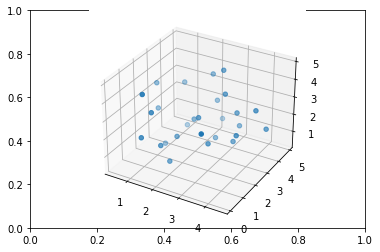

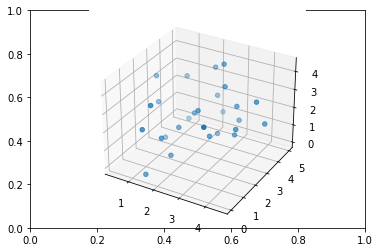

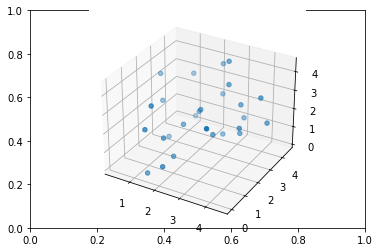

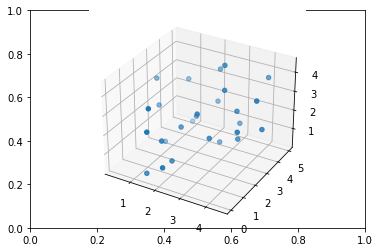

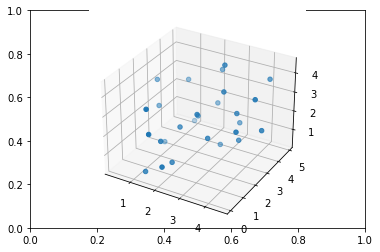

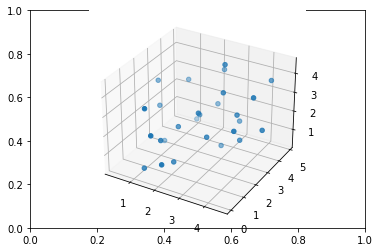

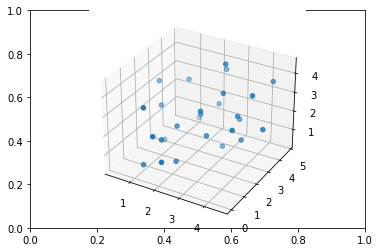

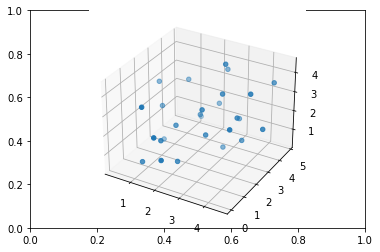

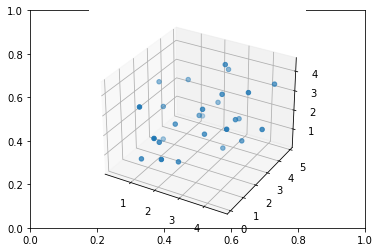

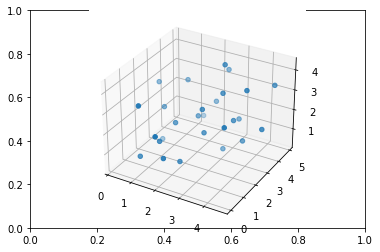

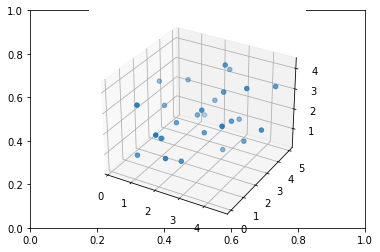

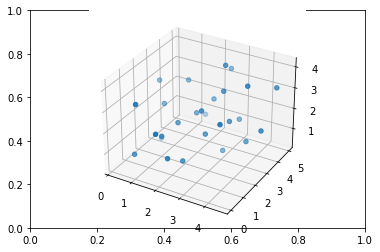

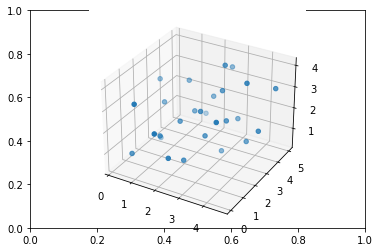

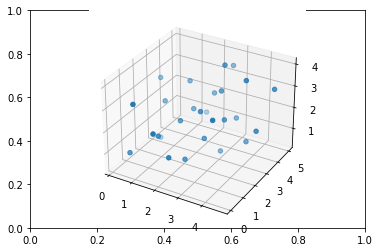

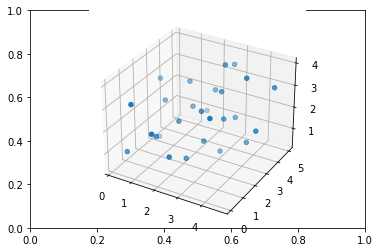

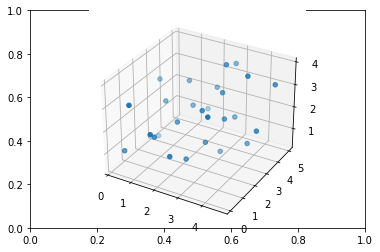

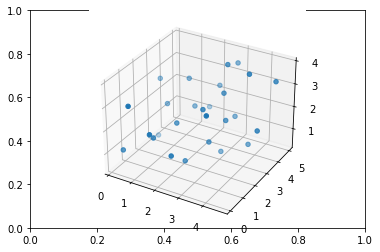

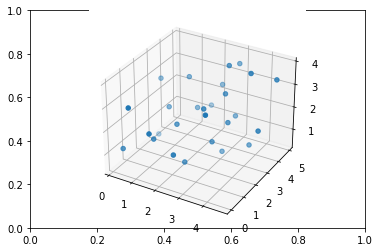

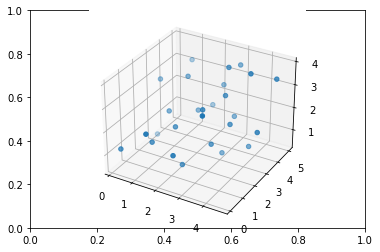

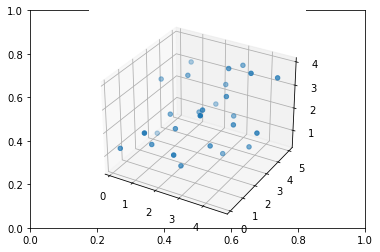

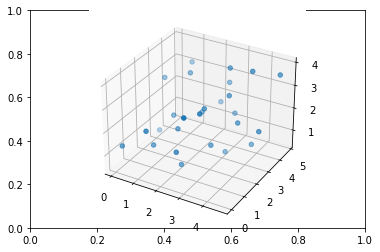

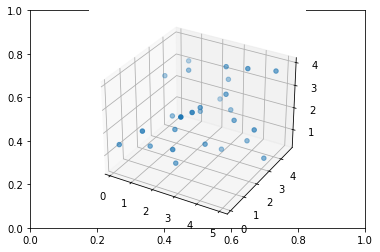

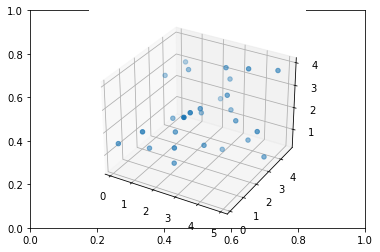

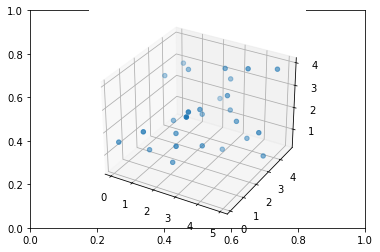

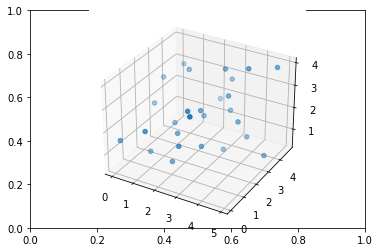

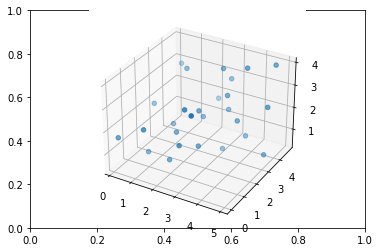

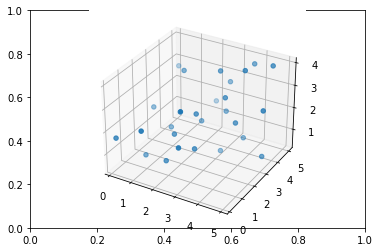

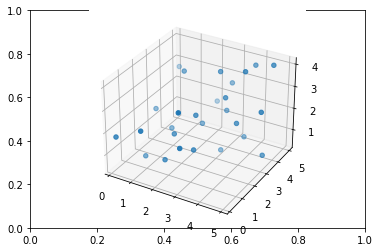

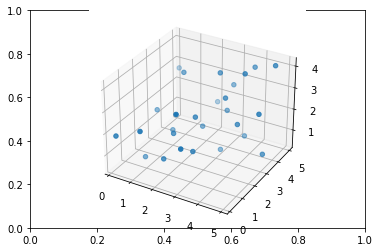

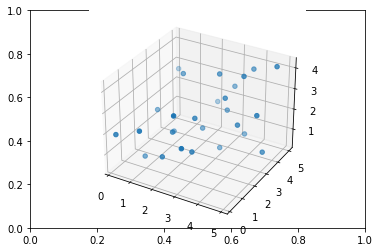

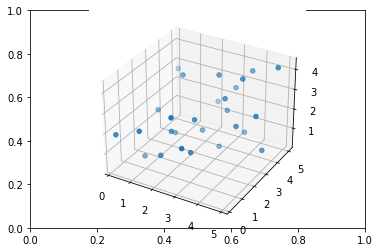

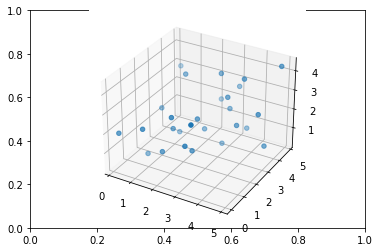

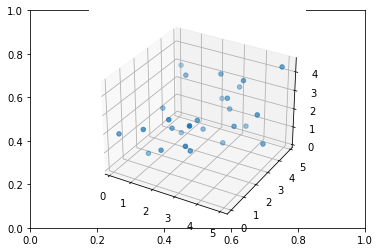

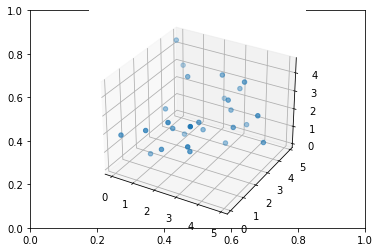

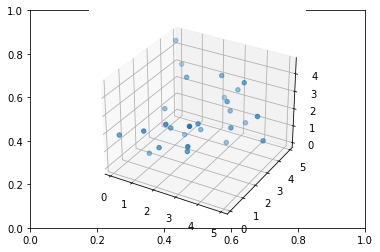

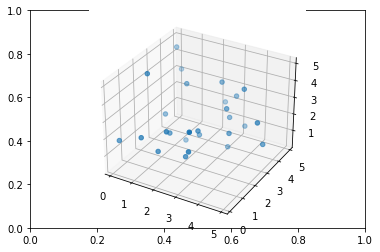

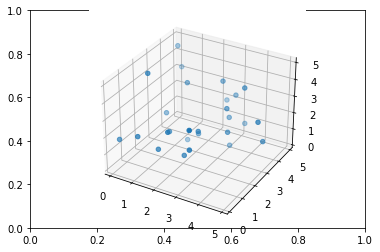

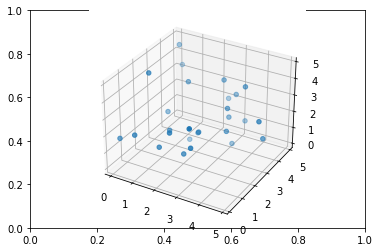

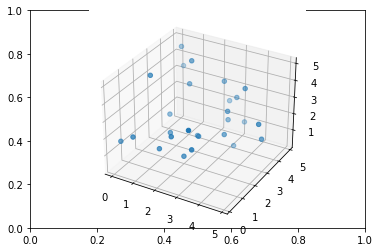

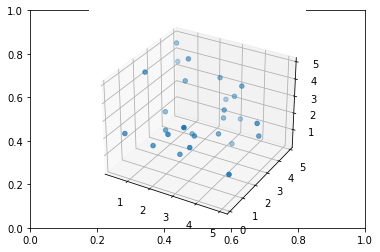

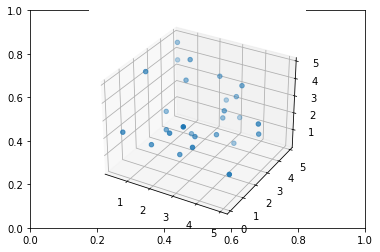

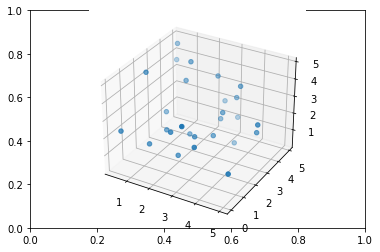

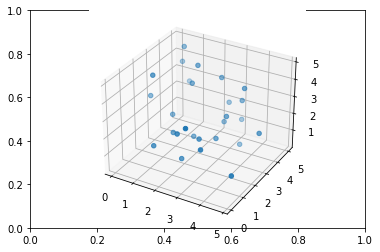

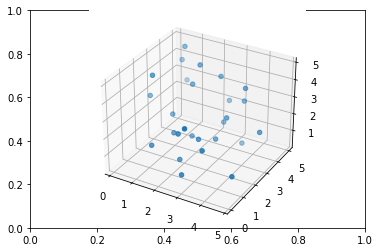

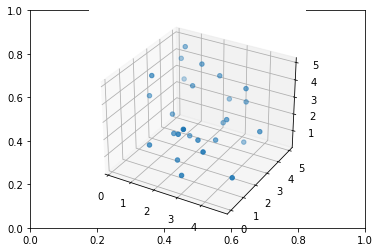

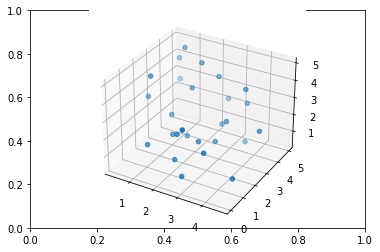

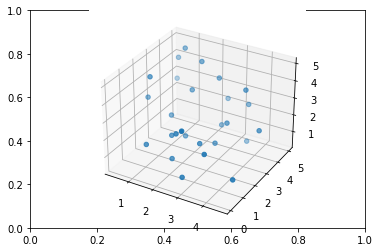

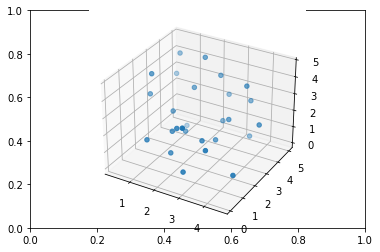

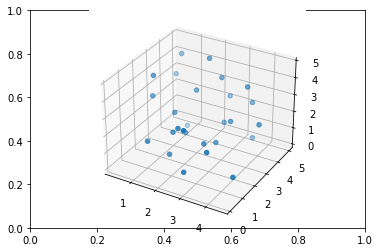

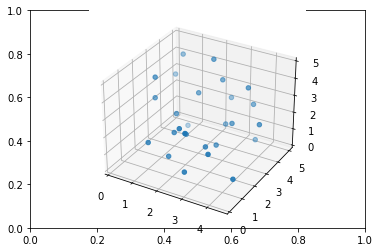

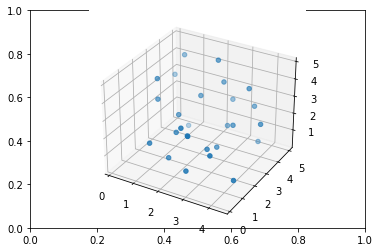

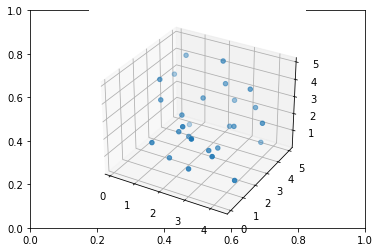

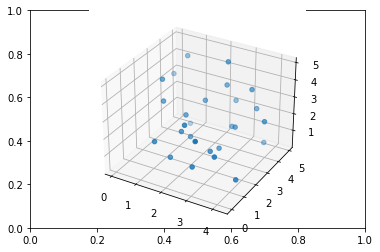

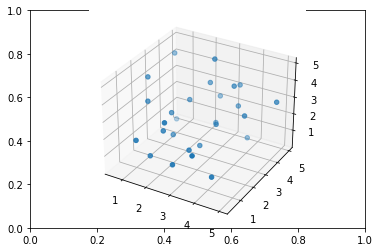

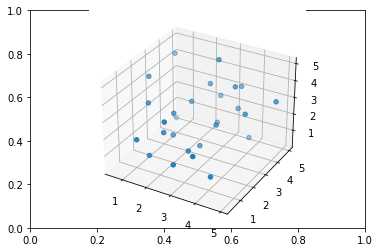

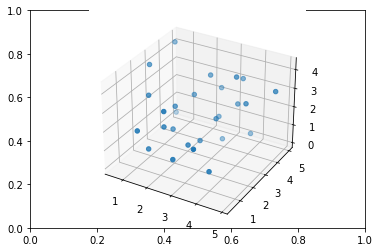

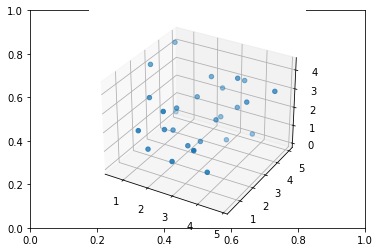

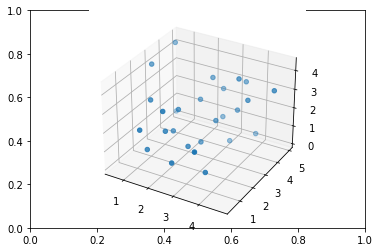

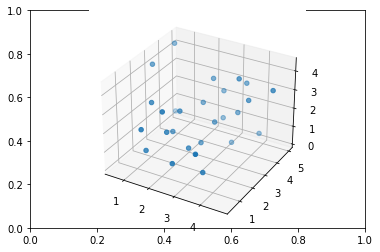

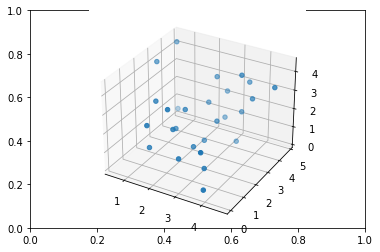

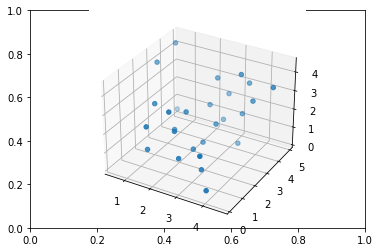

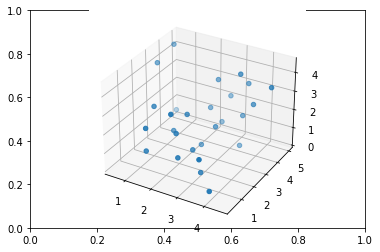

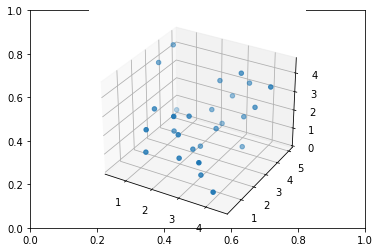

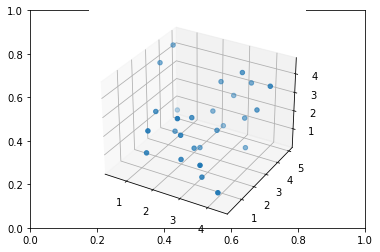

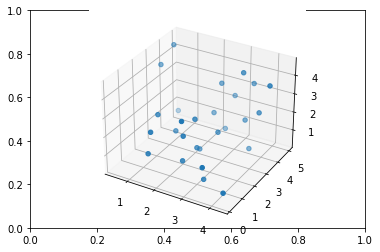

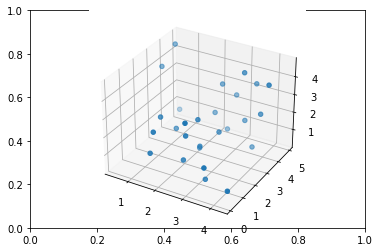

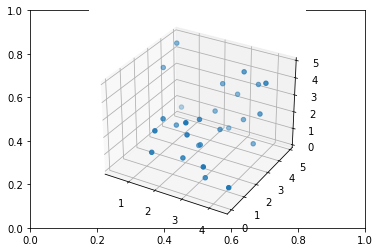

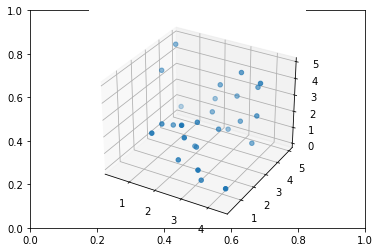

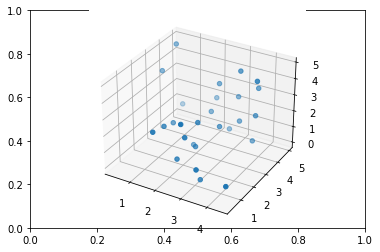

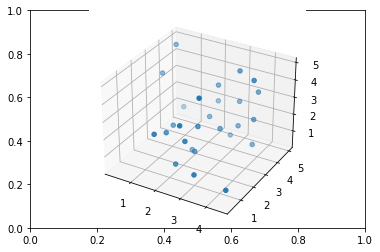

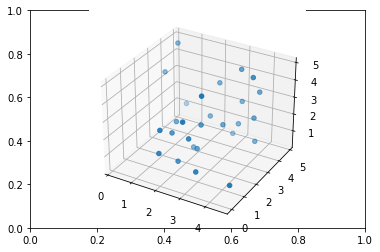

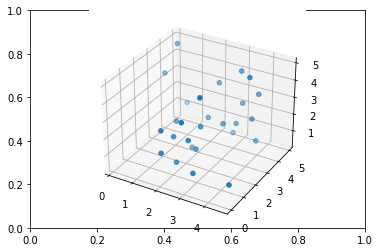

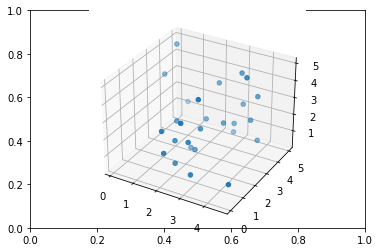

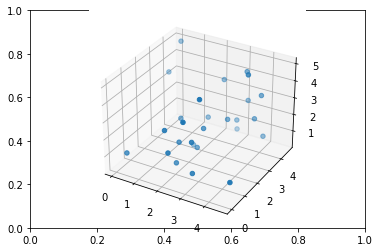

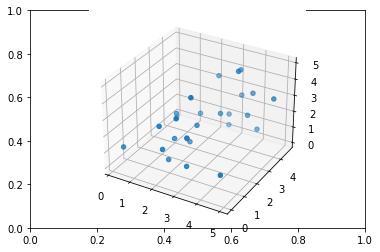

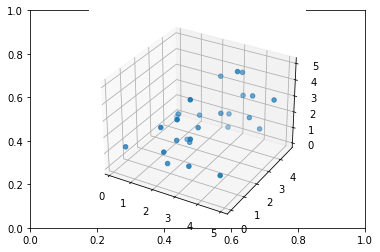

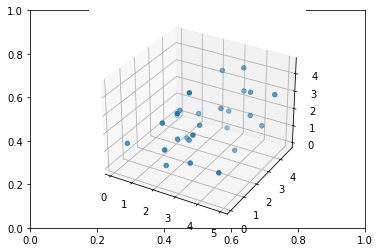

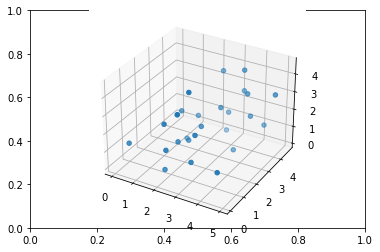

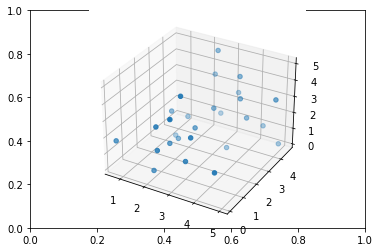

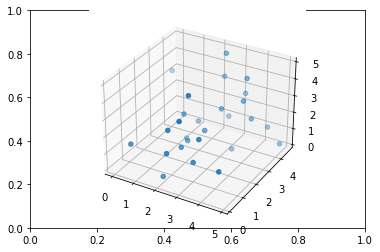

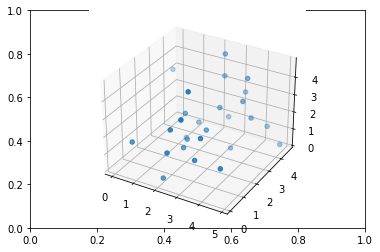

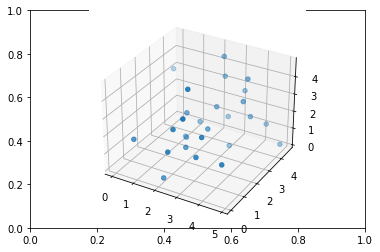

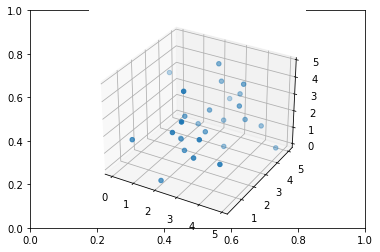

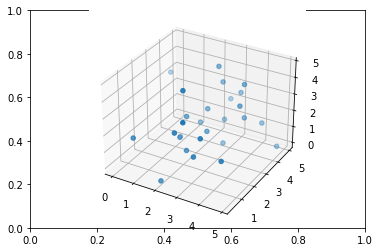

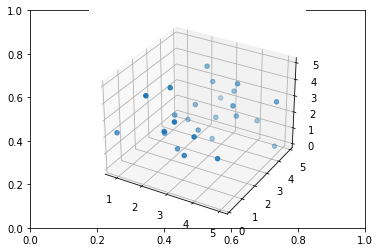

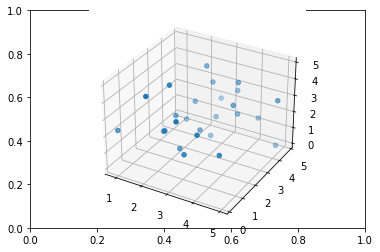

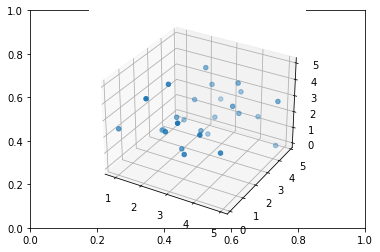

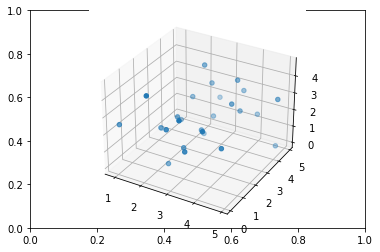

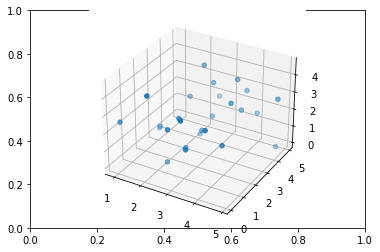

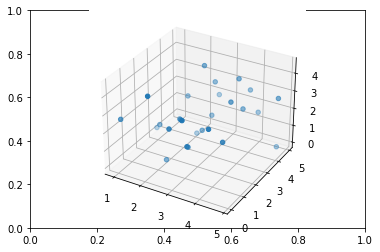

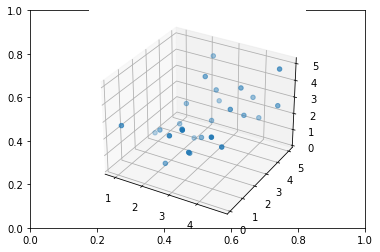

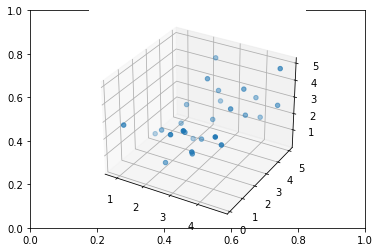

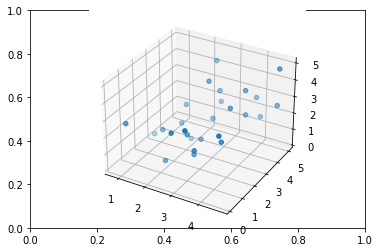

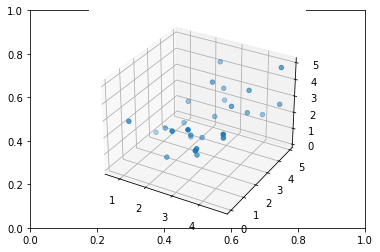

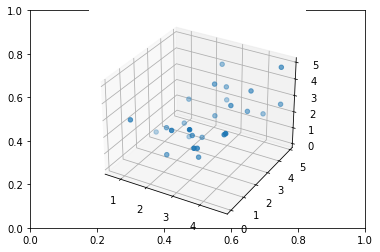

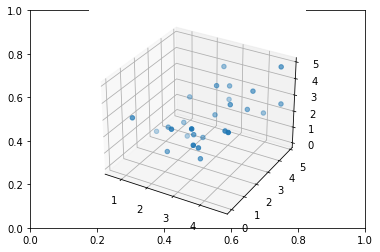

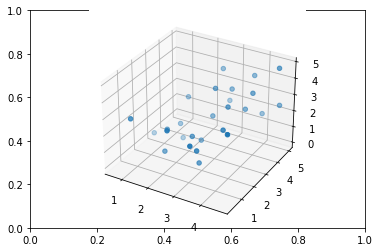

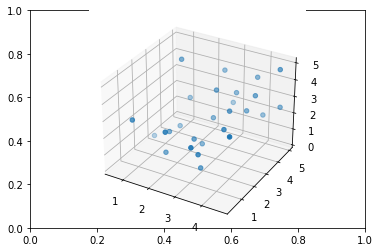

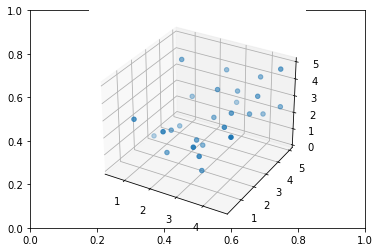

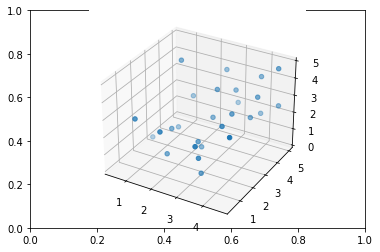

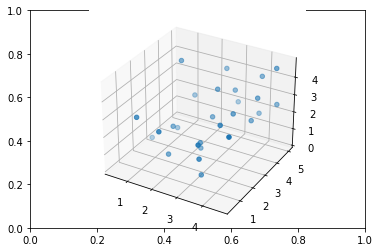

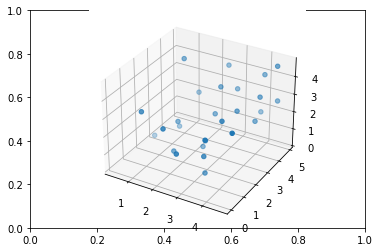

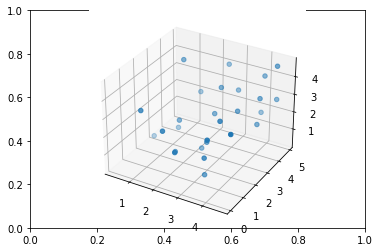

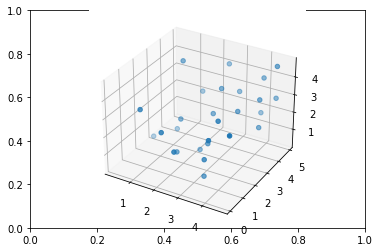

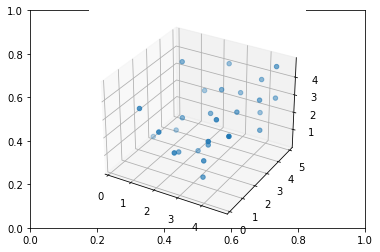

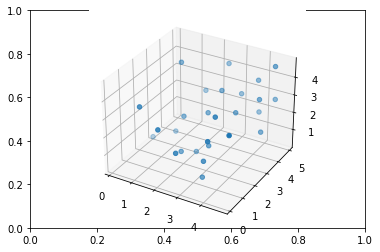

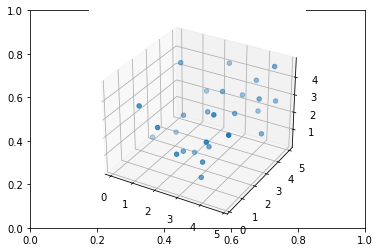

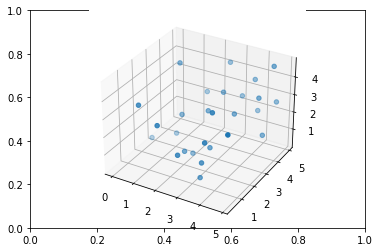

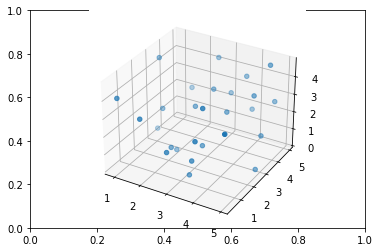

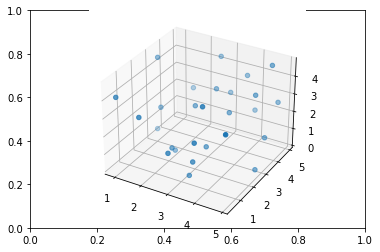

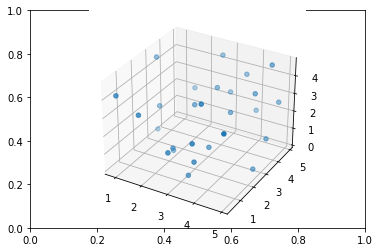

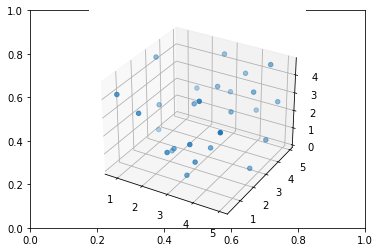

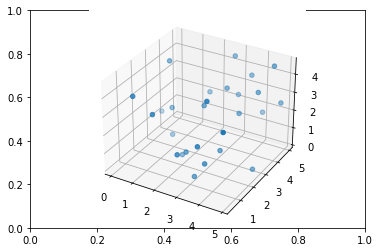

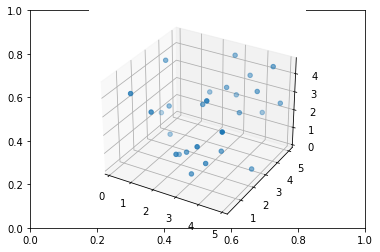

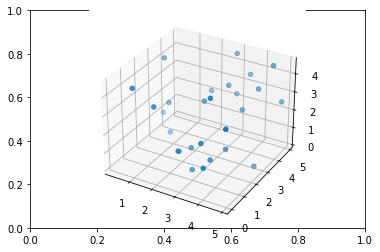

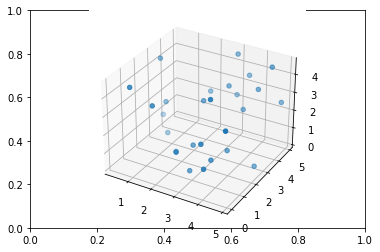

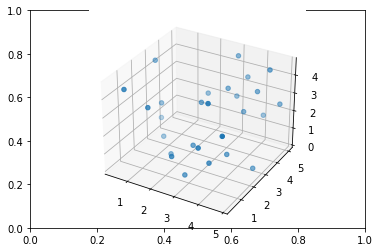

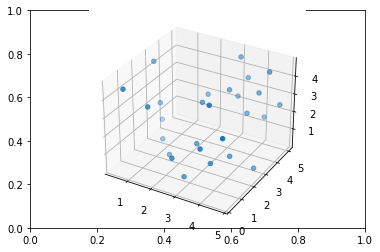

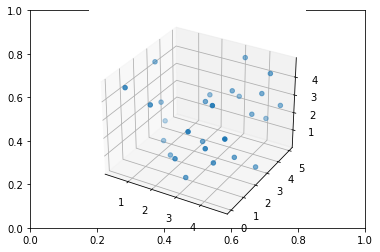

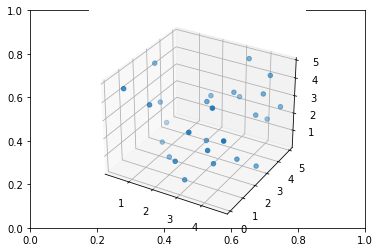

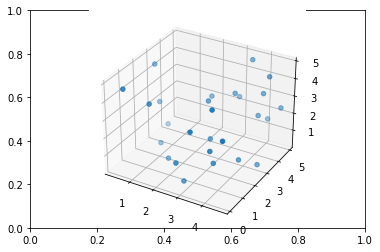

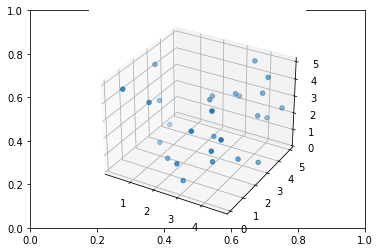

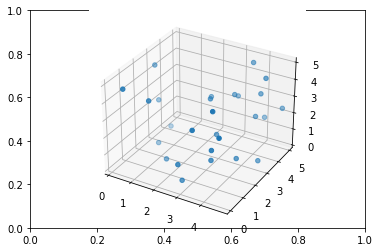

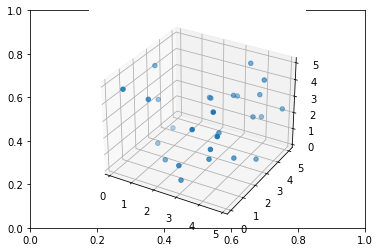

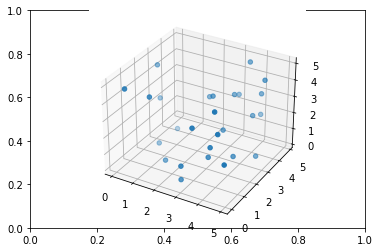

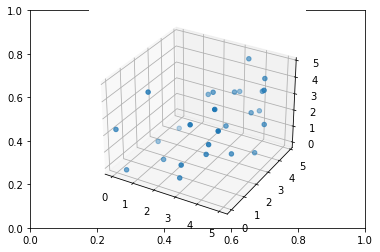

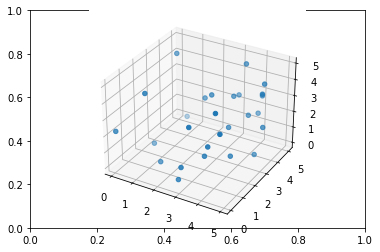

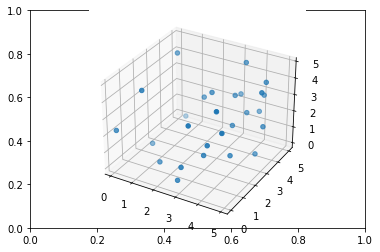

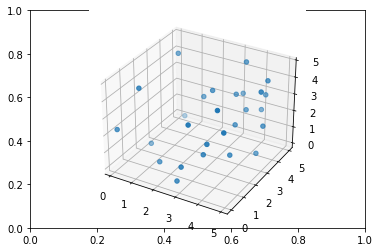

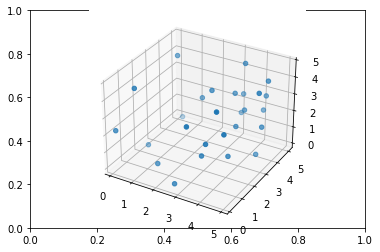

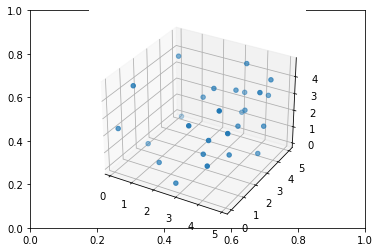

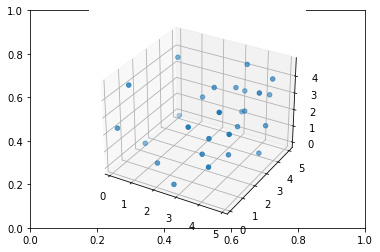

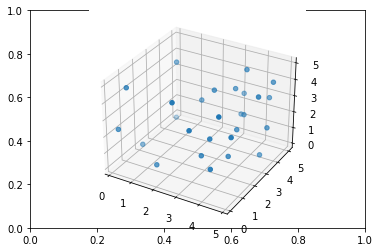

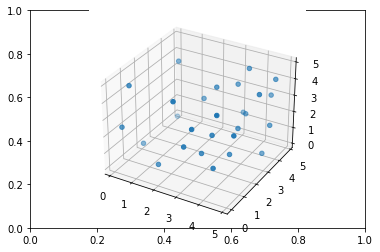

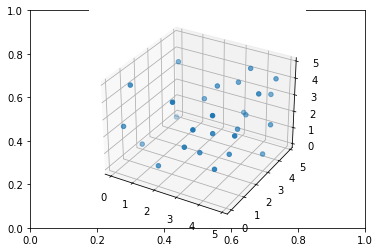

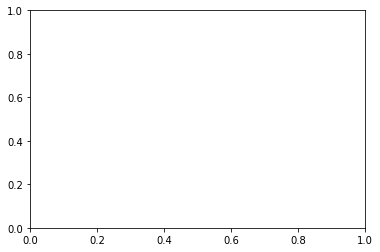

In [286]:
fig=plt.figure(figsize=(7,7))
ax= plt.axes(projection='3d')
for i in range(9999):
    #print(i)
    if(i%50!=0): continue
    else:
        ax= plt.axes(projection='3d')
        ax.scatter3D(x[:,i],y[:,i],z[:,i])
        plt.show()
        plt.cla()
        
#ax.scatter(x[0],y[0],z[0],s=0.1)
plt.show()

## 查看其中一个粒子的速度

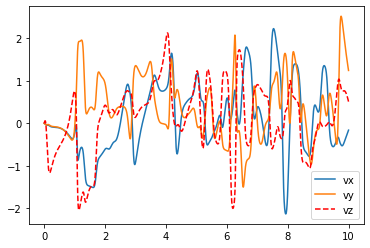

In [287]:
a=plt.plot(t,vx[5],label='vx')
b=plt.plot(t,vy[5],label='vy')
c=plt.plot(t,vz[5],'r--',label='vz')
plt.legend(loc='best')

**观察发现，速度变化几乎均为突变，运动类似粒子间的碰撞**